<a href="https://colab.research.google.com/github/VladislavRkm/cs102/blob/homework06/homework06_data_analysis_RRR_vldslv_rkm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Выполните на языке R следующие задания:

задание 1 – целиком

задание 2 – целиком

задание 3 – целиком

задание 4 – целиком

задание 5 – целиком

задание 6 – не выполнять

задание 7 – целиком

задание 8 – целиком, но в третьем пункте постройте круговую диаграмму

### Задание 1

1. Загрузите датасет music_genre.csv.

2. Возьмите 20 тысяч случайных строк из датасета (все остальные задания выполняйте для этих 20 тысяч строк!!!)

3. Проверьте, есть ли в датасете дублирующиеся строки. Если есть, удалите их.

4. Проверьте, есть ли а датасете строки, в которых значение в столбце artist_name – empty_field. Если есть, выведите эти строки и их количество. А затем удалите из датасета.

In [ ]:
# загружаем библиотеку readr для чтения файлов в формате CSV
library(readr)
# загружает библиотеку tidyverse, которая включает в себя набор пакетов для работы с данными в R
library(tidyverse)
# удаляет дубл. строки
library(dplyr)
# библиотека для работы с визуализацией
library(ggplot2)

install.packages("ggcorrplot")
library(ggcorrplot)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.2     ✔ dplyr   1.1.1
✔ tibble  3.2.1     ✔ stringr 1.4.1
✔ tidyr   1.3.0     ✔ forcats 1.0.0
✔ purrr   1.0.1     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘Rcpp’, ‘reshape2’




In [ ]:
# Пункт 1
# Открываем файл
data_frame <- read_csv("/content/music_genre_new.csv")
head(data_frame)

Rows: 50005 Columns: 18
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): artist_name, track_name, key, mode, tempo, obtained_date, music_genre
dbl (11): instance_id, popularity, acousticness, danceability, duration_ms, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>
32894,Röyksopp,Röyksopp's Night Out,27,0.00468,0.652,-1,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
46652,Thievery Corporation,The Shining Path,31,0.01270,0.622,218293,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
30097,Dillon Francis,Hurricane,28,0.00306,0.620,215613,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
62177,Dubloadz,Nitro,34,0.02540,0.774,166875,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
24907,What So Not,Divide & Conquer,32,0.00465,0.638,222369,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic
89064,Axel Boman,Hello,47,0.00523,0.755,519468,0.731,0.85400,D,0.216,-10.517,Minor,0.0412,?,4-Apr,0.614,Electronic


In [ ]:
# Пункт 2
set.seed(12)
data_frame_sample <- data_frame[sample(nrow(data_frame), 20000), ]
print(nrow(data_frame_sample))

[1] 20000


In [ ]:
# Пункт 3
# Поиск дубликатов
duplicated_rows <- duplicated(data_frame_sample)

# Вывод количества дубликатов
cat("Количество дубликатов:", sum(duplicated_rows), "\n")

Количество дубликатов: 2 


In [ ]:
# Удаление дубликатов
data_frame_sample <- data_frame_sample[!duplicated_rows, ]

In [ ]:
print(nrow(data_frame_sample))

[1] 19998


In [ ]:
# Пункт 4
empty_artist_name <- subset(data_frame_sample, artist_name == "empty_field")
cat("Количество строк с пустым значением в столбце artist_name:", nrow(empty_artist_name), "\n")
head(empty_artist_name)

Количество строк с пустым значением в столбце artist_name: 1020 


instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>
36930,empty_field,Peanut,56,0.3480,0.360,73733,0.624,4.14e-06,C#,0.2640,-6.777,Major,0.2600,77.196,4-Apr,0.529,Hip-Hop
79201,empty_field,Good Old Days,31,0.1040,0.464,261311,0.374,0.00e+00,C,0.1420,-9.482,Major,0.0251,86.571,4-Apr,0.113,Blues
48059,empty_field,You Really Got Me - Mono Mix,72,0.4930,0.573,134253,0.939,0.00e+00,G#,0.0994,-6.441,Major,0.0808,137.382,4-Apr,0.963,Rock
23181,empty_field,Standing in the Rain (with Mark Ronson & Dan Auerbach),54,0.0168,0.642,202145,0.901,1.97e-06,C#,0.0887,-3.688,Minor,0.0773,100.039,4-Apr,0.352,Alternative
27344,empty_field,It's Gonna Be Alright,23,0.1330,0.524,194947,0.648,0.00e+00,G,0.1170,-5.528,Major,0.0393,?,4-Apr,0.708,Blues
37009,empty_field,Green Day,41,0.1170,0.805,354893,0.794,3.15e-01,G,0.3150,-7.469,Minor,0.0682,104.992,4-Apr,0.733,Electronic


In [ ]:
# Удаляем строки с пустым значением в столбце "artist_name"
data_frame_sample <- data_frame_sample[data_frame_sample$artist_name != "empty_field", ]
print(nrow(data_frame_sample))

[1] 18978


### Задание 2

1. Выведите долю каждого жанра в датасете.
2. Покажите на горизонтальной столбиковой диаграмме распределение количества треков по жанрам. Выделите контрастным цветом жанр, в котором больше всего песен.
3. Найдите самый танцевальный жанр. У самого танцевального жанра среднее значение показателя danceability должно быть наивысшим.
4. Для каждого жанра определите, какая тональность в нем преобладает – количество треков какой тональность больше (минор или мажор).


In [ ]:
# Пункт 1
genres <- unique(data_frame_sample$music_genre)
if (any(!is.na(data_frame_sample$music_genre))) {
  genres <- unique(data_frame_sample$music_genre[!is.na(data_frame_sample$music_genre)])
} else {
  genres <- NULL
}
print(genres)

 [1] "Alternative" "Electronic"  "Classical"   "Country"     "Rap"        
 [6] "Rock"        "Anime"       "Jazz"        "Hip-Hop"     "Blues"      


In [ ]:
music_dict <- list()
for (genre in genres) {
  count <- nrow(data_frame_sample[data_frame_sample$music_genre == genre,])
  part_of_genre <- count / nrow(data_frame_sample)
  if (genre == genre) {
    music_dict[[genre]] <- part_of_genre
  }
  cat(paste0("Часть ", genre, " от общего количества: ", part_of_genre, "\n"))
}

Часть Alternative от общего количества: 0.0983243755927917
Часть Electronic от общего количества: 0.0997470755611761
Часть Classical от общего количества: 0.0999578459268627
Часть Country от общего количества: 0.100168616292549
Часть Rap от общего количества: 0.0979028348614185
Часть Rock от общего количества: 0.100379386658236
Часть Anime от общего количества: 0.0989566866898514
Часть Jazz от общего количества: 0.101907471809464
Часть Hip-Hop от общего количества: 0.100484771841079
Часть Blues от общего количества: 0.102645168089367


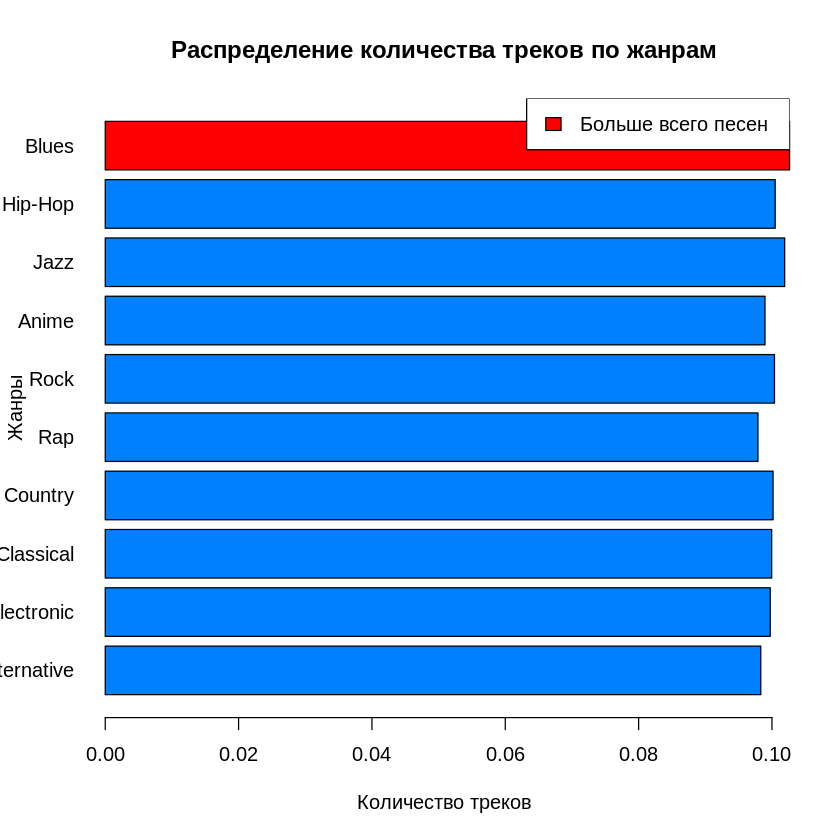

In [ ]:
# Пункт 2
# Создание списка меток жанров и списка значений
labels <- names(music_dict)
values <- unlist(music_dict)

# Расчет цветов для каждого столбца
colors <- ifelse(values != max(values), "#0080ff", "#ff0000")

# Построение столбиковой диаграммы
barplot(values, horiz = TRUE, col = colors, names.arg = labels, 
        xlab = "Количество треков", ylab = "Жанры", 
        main = "Распределение количества треков по жанрам", las = 1)

# Добавление легенды
legend("topright", legend = c("Больше всего песен"), fill = "#ff0000")

In [ ]:
# Пункт 3
# Группировка данных по жанрам и подсчет среднего значения показателя danceability для каждого жанра
dance_genre <- data_frame %>%
  group_by(music_genre) %>%
  summarise(mean_danceability = mean(danceability, na.rm = TRUE)) %>%
  arrange(desc(mean_danceability))

# Вывод жанра с наивысшим средним значением danceability
cat("Самый танцевальный жанр:", dance_genre$music_genre[1], "\n")
cat("Среднее значение показателя danceability для самого танцевального жанра:", dance_genre$mean_danceability[1], "\n")

Самый танцевальный жанр: Hip-Hop 
Среднее значение показателя danceability для самого танцевального жанра: 0.717373 


In [ ]:
# Пункт 4
# Разделение выборки на две части: с мажорными и с минорными тональностями
df_major <- data_frame_sample[data_frame_sample$mode == "Major", ]
df_minor <- data_frame_sample[data_frame_sample$mode == "Minor", ]

# Подсчет наиболее часто встречающихся тональностей в каждом жанре для каждой части выборки
major_table <- table(df_major$music_genre, df_major$mode)
minor_table <- table(df_minor$music_genre, df_minor$mode)

# Определение преобладающей тональности в каждом жанре
for (genre in unique(data_frame_sample$music_genre)) {
  if (!is.na(genre)) {
    major_count <- major_table[genre, "Major"]
    minor_count <- minor_table[genre, "Minor"]
    if (major_count > minor_count) {
      cat(paste0("В жанре ", genre, " преобладает тональность Major\n"))
    } else if (major_count < minor_count) {
      cat(paste0("В жанре ", genre, " преобладает тональность Minor\n"))
    } else {
      cat(paste0("В жанре ", genre, " нет преобладающей тональности\n"))
    }
  }
}

В жанре Alternative преобладает тональность Major
В жанре Electronic преобладает тональность Major
В жанре Classical преобладает тональность Major
В жанре Country преобладает тональность Major
В жанре Rap преобладает тональность Major
В жанре Rock преобладает тональность Major
В жанре Anime преобладает тональность Major
В жанре Jazz преобладает тональность Major
В жанре Hip-Hop преобладает тональность Major
В жанре Blues преобладает тональность Major


### Задание 3

1. Выведите исполнителя, у которого больше всего треков в датасете. И того, у которого их меньше всех.
2. Покажите на горизонтральной столбиковой диаграмме топ-20 исполнителей. Изучите результат и сделайте выводы.

In [ ]:
# Пункт 1
most_tracks_artist <- names(sort(table(data_frame_sample$artist_name), decreasing = TRUE))[1]
cat("Исполнитель с наибольшим количеством треков:", most_tracks_artist, "\n")

least_tracks_artist <- names(sort(table(data_frame_sample$artist_name)))[1]
cat("Исполнитель с наименьшим количеством треков:", least_tracks_artist, "\n")

Исполнитель с наибольшим количеством треков: Wolfgang Amadeus Mozart 
Исполнитель с наименьшим количеством треков: ? & The Mysterians 


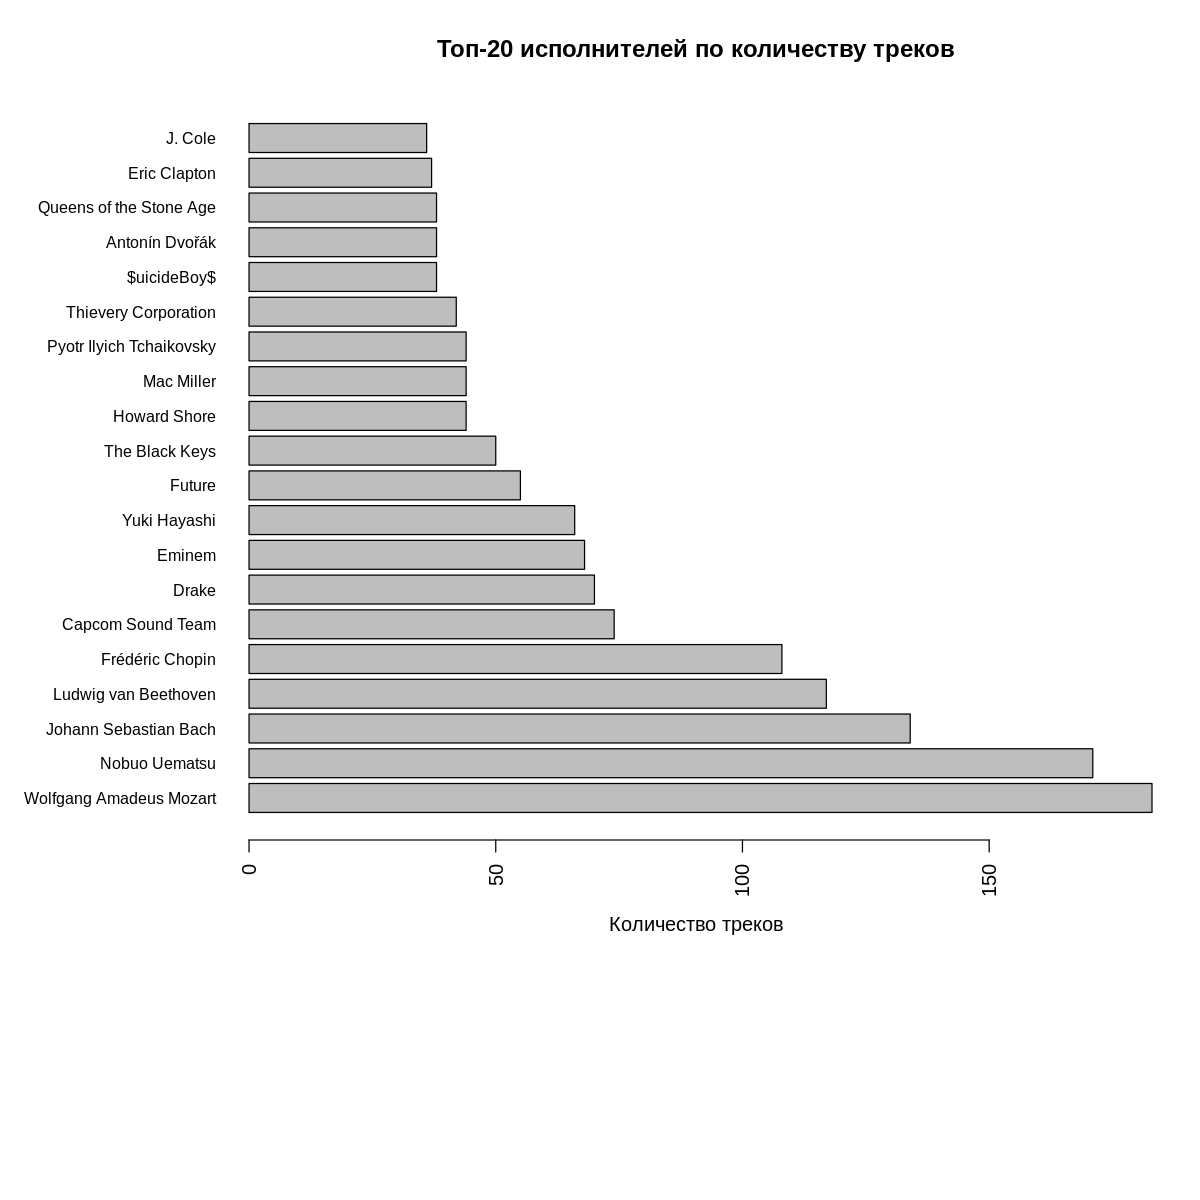

In [ ]:
# Пункт 2
# создаем таблицу с количеством треков каждого исполнителя
df_artist_track_count <- data_frame_sample %>%
  group_by(artist_name) %>%
  summarize(track_count = n()) %>%
  arrange(desc(track_count))

# выбираем топ-20 исполнителей
df_top_artists <- df_artist_track_count %>% head(20)

par(mar=c(15, 10, 4, 2))

# создаем столбиковую диаграмму
p <- barplot(df_top_artists$track_count, 
             names.arg = df_top_artists$artist_name, 
             horiz = TRUE, 
             # уменьшаем размер шрифта имён исполнителей
             cex.names = 0.8,
             # поворачиваем их на 90 градусов
             las = 2)

# добавляем заголовок и подписи осей
title(main = "Топ-20 исполнителей по количеству треков",
      xlab = "Количество треков",
      ylab = "")

options(repr.plot.width=10, repr.plot.height=10)

# добавляем текст с количеством треков над каждым столбцом
text(p, df_top_artists$track_count, labels = df_top_artists$track_count, pos = 3)

Моцарт стал лидером по количеству песен

### Задание 4

1. Постройте корреляционную матрицу для характеристик треков. Между какими характеристиками сильная корреляция? Между какими слабая? Есть ли характеристики, между которыми корреляции практически нет.
2. Посчитайте корреляцию между популярностью (popularity) и длиной названия трека.

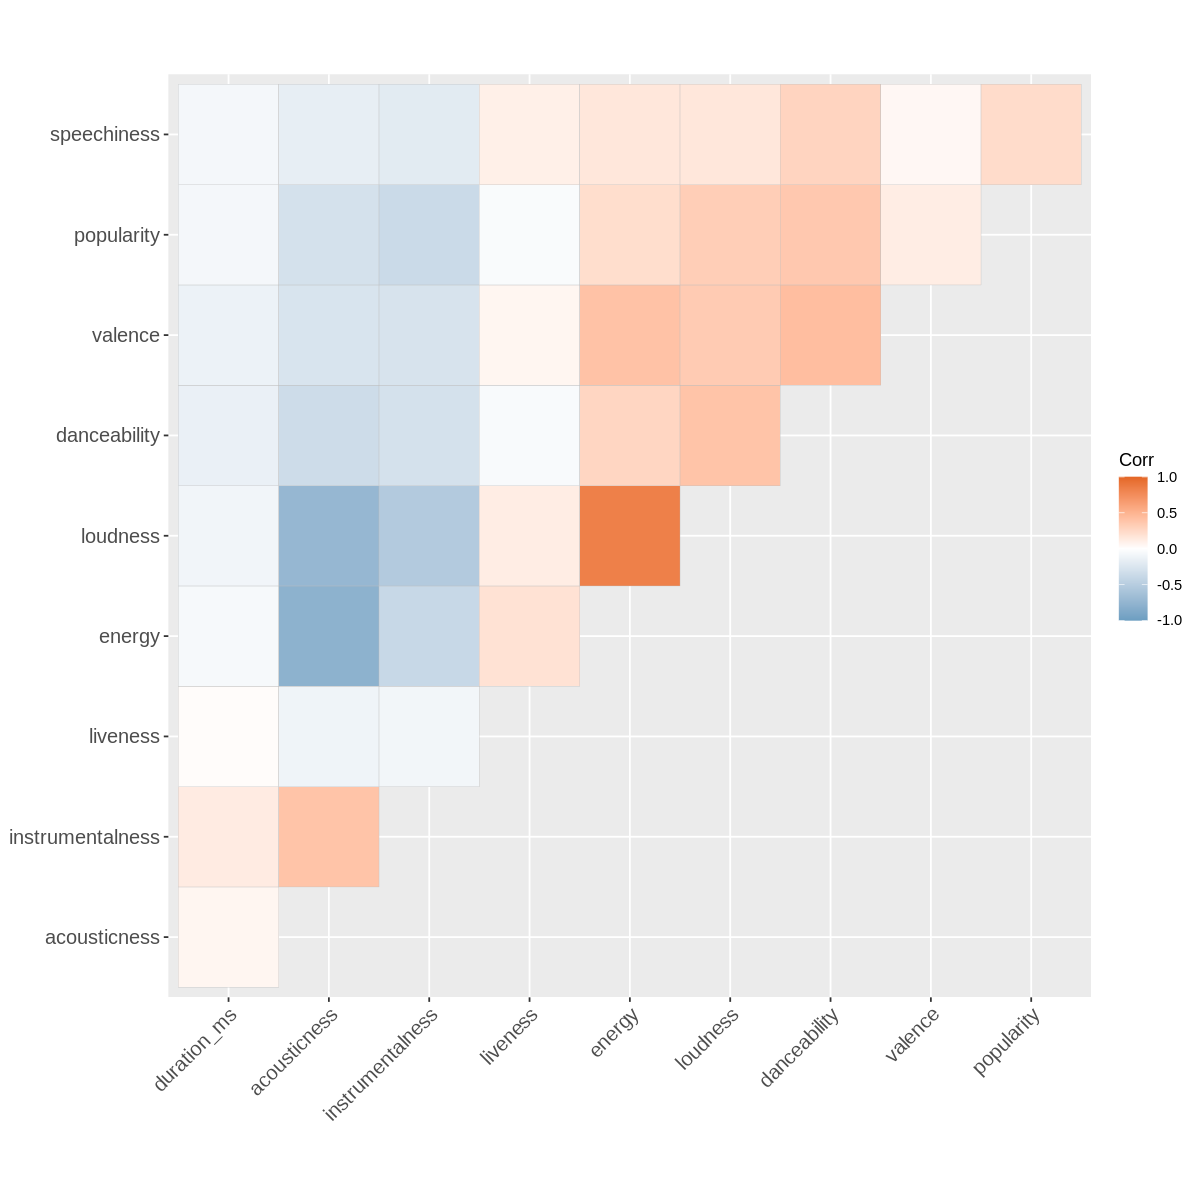

In [ ]:
df_track_features <- data_frame_sample %>%
  select(popularity, acousticness, danceability, duration_ms, energy, instrumentalness, liveness, loudness, speechiness, valence)

df_track_features[is.na(df_track_features)] <- 0

corr <- cor(df_track_features)

ggcorrplot(corr, hc.order = TRUE,
           type = "upper",
           ggtheme = ggplot2::theme_gray,
           colors = c("#6D9EC1", "white", "#E46726"))

**Анализ матрицы:**

Сильную положительную корреляцию (близкую к 1) можно наблюдать между параметрами energy и loudness, а также между параметрами valence и danceability.

Сильную отрицательную корреляцию (близкую к -1) можно наблюдать между параметрами acousticness и energy.

In [ ]:
cor(data_frame_sample$popularity, nchar(data_frame_sample$track_name), use = "complete.obs")
# чем меньше длина трека, тем он популярнее

[1] -0.2247511

### Задание 5

1. Покажите на ящиковой диаграмме отношение популярности треков к жанру. Какие жанры похожи между собой?

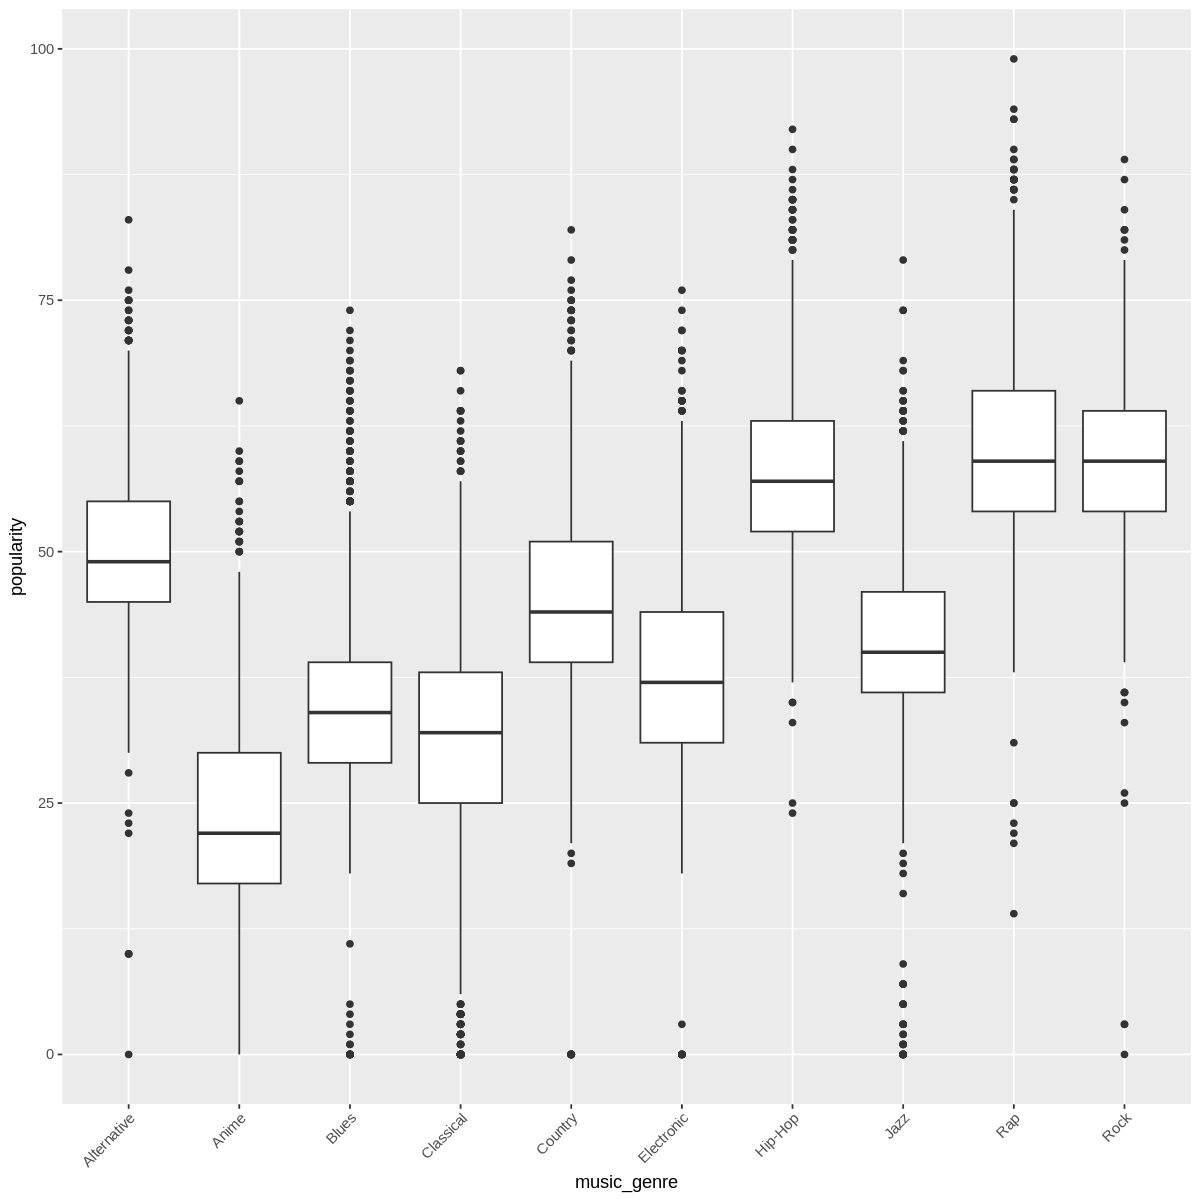

In [ ]:
data_genre_popularity <- na.omit(data_frame_sample %>%
  select(music_genre, popularity))

ggplot(data_genre_popularity, aes(x = music_genre, y = popularity)) +
  geom_boxplot() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

Между некоторыми жанрами есть значительные пересечения в распределении популярности, например, между "Hip-Hop", "Rock" и "Rap".

### Задание 7
На вертикальной столбиковой диаграмме для самого популярного (popularity) и самого непопулярного жанров покажите средние значения по всем характеристикам. Отрицательные и положительные значения характеристик показывайте разными цветами.

In [ ]:
# data_frame_sample <- mutate(data_frame_sample, duration_m = duration_ms / 60000)
# data_frame_sample <- subset(data_frame_sample, select = -c(duration_ms))

head(data_frame_sample)

instance_id,artist_name,track_name,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre,duration_m
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>
22836,My Morning Jacket,One Big Holiday,46,0.0925,0.412,0.917,0.014300,A,0.240,-7.036,Minor,0.0525,136.85,4-Apr,0.3130,Alternative,5.356217
21384,Baauer,Hate Me,51,0.2520,0.743,0.494,0.002450,F,0.456,-9.303,Major,0.1290,92.944,4-Apr,0.4120,Electronic,2.449533
29153,Ólafur Arnalds,Reminiscence,44,0.7850,0.183,0.131,0.899000,C#,0.121,-17.785,Minor,0.0401,111.851,4-Apr,0.0543,Classical,4.469117
69755,LAXX,Fake Friends,36,0.0603,0.692,0.847,0.000165,C#,0.333,-4.870,Major,0.2880,124.9,4-Apr,0.3700,Electronic,2.888000
60069,Craig Morgan,That's What I Love About Sunday,65,0.4790,0.600,0.560,0.000000,G#,0.111,-6.311,Major,0.0325,139.469,4-Apr,0.4170,Country,3.358217
74306,$uicideBoy$,Bring Out Your Dead,62,0.0244,0.835,0.896,0.000000,C#,0.519,-7.953,Major,0.2660,112.01,4-Apr,0.9060,Rap,1.767350


Warning message:
“Removed 1 rows containing missing values (`position_stack()`).”


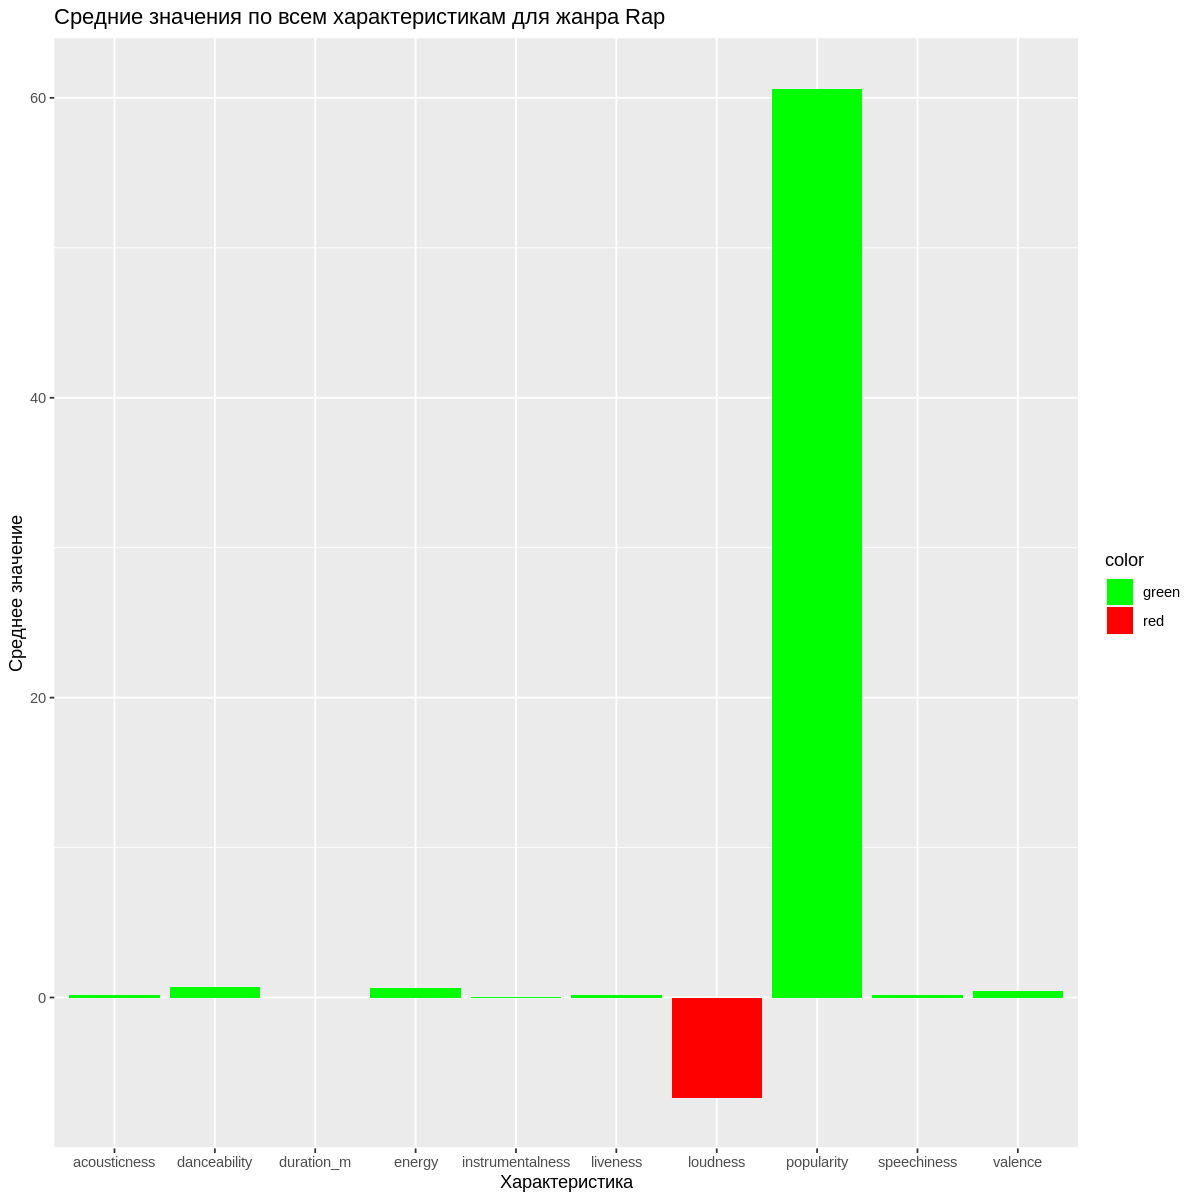

In [ ]:
# для самого популярного жанра
most_popular_genre <- names(sort(table(data_frame_sample$music_genre), decreasing = FALSE))[1]
filtered_df <- subset(data_frame_sample, music_genre == most_popular_genre)
mean_values <- sapply(filtered_df[, sapply(filtered_df, is.numeric)], mean, na.rm = TRUE)
mean_values["duration_m"] <- mean_values["duration_ms"] / (1000 * 60)
mean_df <- data.frame(
  feature = names(mean_values),
  mean_value = mean_values
)

mean_df <- mean_df[mean_df$feature != "instance_id", ]

mean_df$feature[mean_df$feature == "duration_ms"] <- "duration_m"

mean_df$color <- ifelse(mean_df$mean_value >= 0, "green", "red")

ggplot(mean_df, aes(x = feature, y = mean_value, fill = color)) +
  geom_bar(stat = "identity") +
  ggtitle(paste("Средние значения по всем характеристикам для жанра", most_popular_genre)) +
  xlab("Характеристика") +
  ylab("Среднее значение") +
  scale_fill_manual(values = c("green", "red"))

Warning message in music_genre == least_popular_genre:
“longer object length is not a multiple of shorter object length”


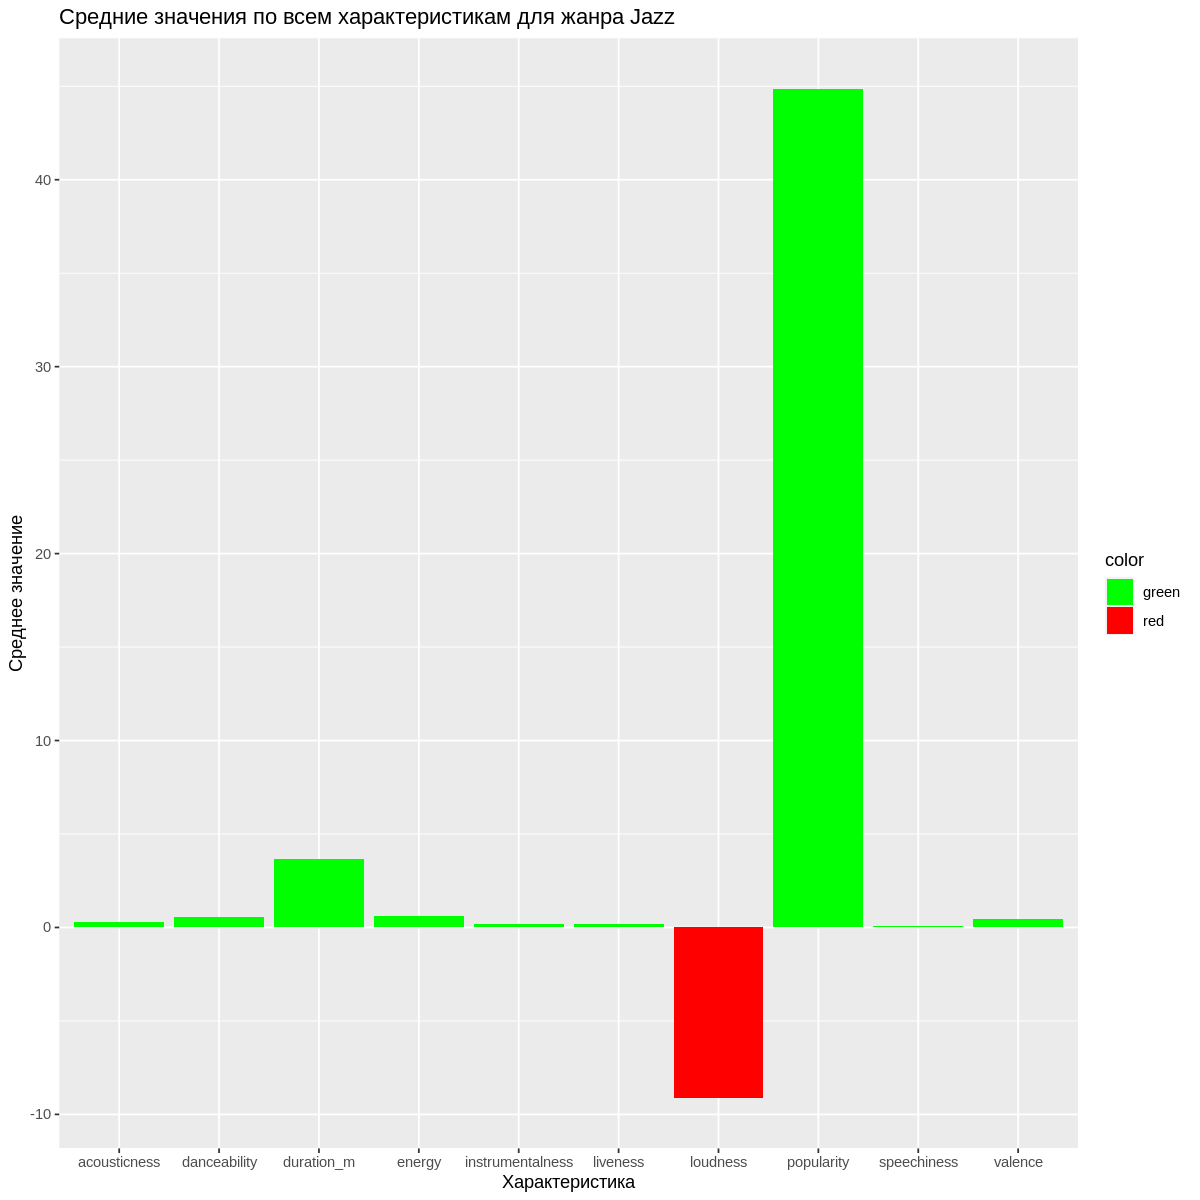

In [ ]:
# для самого непопулярного жанра
least_popular_genre <- names(sort(table(data_frame_sample$music_genre), decreasing = TRUE))[-1]
filtered_df <- subset(data_frame_sample, music_genre == least_popular_genre)
mean_values <- sapply(filtered_df[, sapply(filtered_df, is.numeric)], mean, na.rm = TRUE)
mean_df <- data.frame(
  feature = names(mean_values),
  mean_value = mean_values
)

mean_df <- mean_df[mean_df$feature != "instance_id", ]

mean_df$color <- ifelse(mean_df$mean_value >= 0, "green", "red")

ggplot(mean_df, aes(x = feature, y = mean_value, fill = color)) +
  geom_bar(stat = "identity") +
  ggtitle(paste("Средние значения по всем характеристикам для жанра", least_popular_genre)) +
  xlab("Характеристика") +
  ylab("Среднее значение") +
  scale_fill_manual(values = c("green", "red"))


### Задание 8
1. Добавьте в данные категориальный столбец `длительность_трека`, в котором будут значения: "короткая" (<=3min), "средняя" (>3min, <=5min), "длинная" (>5min). 
2. Покажите график плотности распределения данных в столбце `loudness`, сгруппированных по категориям длительности.
3. На круговой диаграмме вида "пончик" покажите численное соотношение треков разной длительности.

In [ ]:
dict_length <- list()

for (key in unique(data_frame_sample$duration_m)) {
  if (!is.na(key)) {
    if (key <= 3) {
      dict_length[[as.character(key)]] <- "короткая"
    } else if (key > 3 & key <= 5) {
      dict_length[[as.character(key)]] <- "средняя"
    } else {
      dict_length[[as.character(key)]] <- "длинная"
    }
  }
}

data_frame_sample$длительность_трека <- sapply(data_frame_sample$duration_m, function(x) dict_length[[as.character(x)]])
head(data_frame_sample)

,instance_id,artist_name,track_name,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,⋯,speechiness,tempo,obtained_date,valence,music_genre,duration_m,длительность_трека,duration_cat,percent.duration_cat,percent.Freq
,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,⋯,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<list>,<fct>,<fct>,<dbl>
1,22836,My Morning Jacket,One Big Holiday,46,0.0925,0.412,0.917,0.014300,A,0.240,⋯,0.0525,136.85,4-Apr,0.3130,Alternative,5.356217,длинная,длинная,короткая,27.6
2,21384,Baauer,Hate Me,51,0.2520,0.743,0.494,0.002450,F,0.456,⋯,0.1290,92.944,4-Apr,0.4120,Electronic,2.449533,короткая,короткая,средняя,56.4
3,29153,Ólafur Arnalds,Reminiscence,44,0.7850,0.183,0.131,0.899000,C#,0.121,⋯,0.0401,111.851,4-Apr,0.0543,Classical,4.469117,средняя,средняя,длинная,16.0
4,69755,LAXX,Fake Friends,36,0.0603,0.692,0.847,0.000165,C#,0.333,⋯,0.2880,124.9,4-Apr,0.3700,Electronic,2.888000,короткая,короткая,короткая,27.6
5,60069,Craig Morgan,That's What I Love About Sunday,65,0.4790,0.600,0.560,0.000000,G#,0.111,⋯,0.0325,139.469,4-Apr,0.4170,Country,3.358217,средняя,средняя,средняя,56.4
6,74306,$uicideBoy$,Bring Out Your Dead,62,0.0244,0.835,0.896,0.000000,C#,0.519,⋯,0.2660,112.01,4-Apr,0.9060,Rap,1.767350,короткая,короткая,длинная,16.0


Warning message:
“Removed 1 rows containing non-finite values (`stat_density()`).”
Don't know how to automatically pick scale for object of type
<tbl_df/tbl/data.frame>. Defaulting to continuous.
ERROR while rich displaying an object: Error in `data[[var]][scale_index[[i]]]`:
! Can't subset columns past the end.
ℹ Locations 2, 3, 4, …, 5241, and 5242 don't exist.
ℹ There is only 1 column.

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No rep

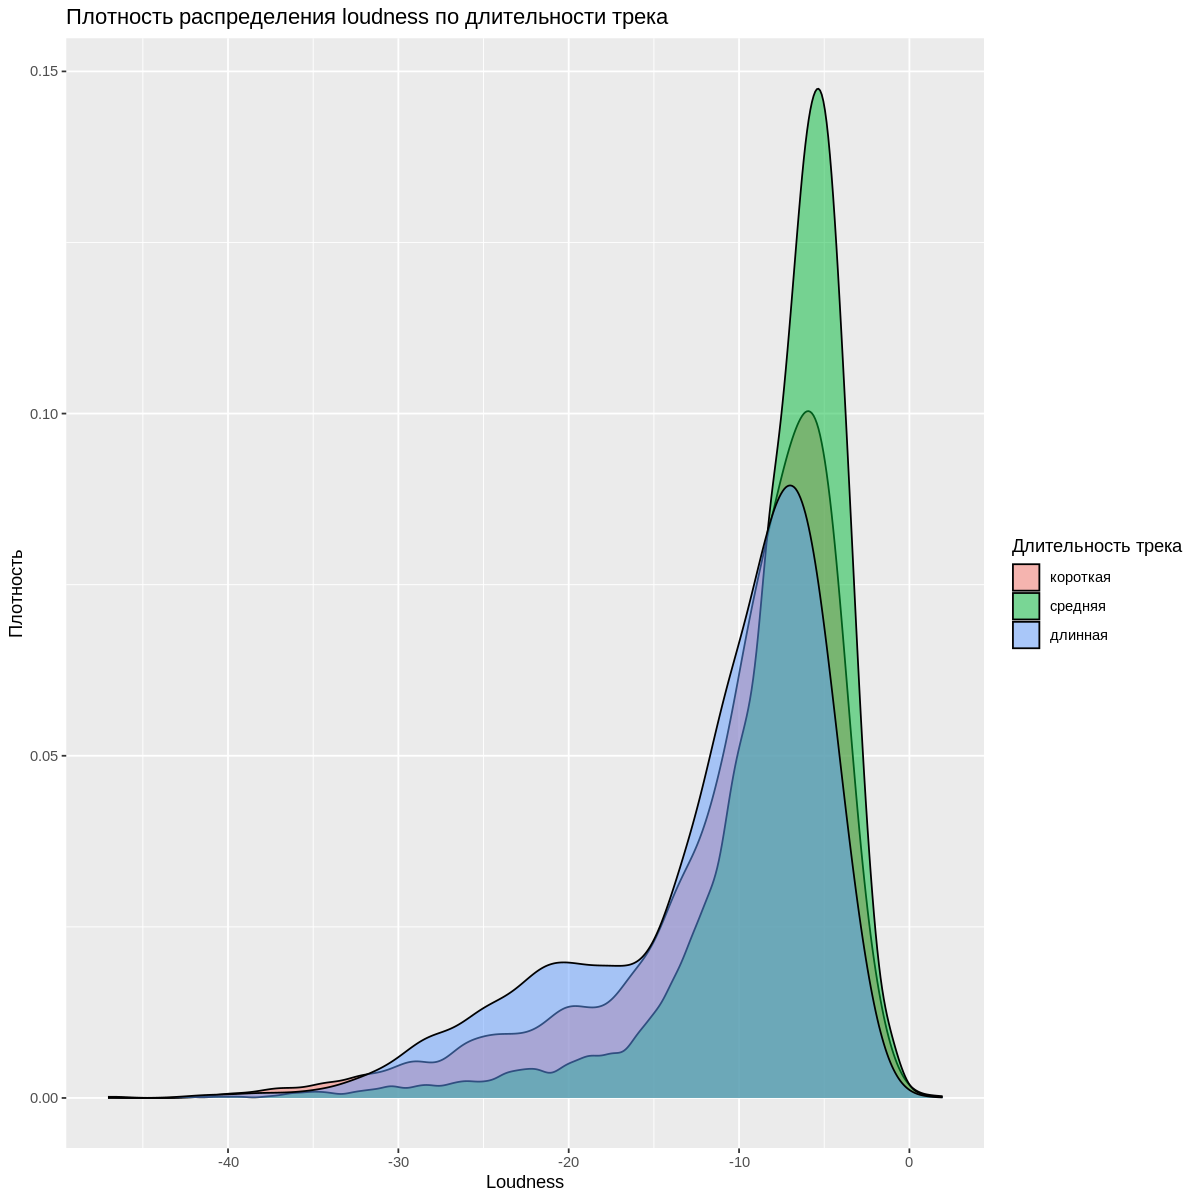

In [ ]:
# объединяем данные в один фрейм данных и добавляем столбец с категориями длительности трека
data_frame_sample$duration_cat <- factor(data_frame_sample$длительность_трека, levels = c("короткая", "средняя", "длинная"))

# строим график плотности распределения для каждой категории
ggplot(data_frame_sample, aes(x = loudness, fill = duration_cat)) + 
  geom_density(alpha = 0.5) +
  labs(title = "Плотность распределения loudness по длительности трека", 
       x = "Loudness", y = "Плотность") +
  scale_fill_discrete(name = "Длительность трека")

# задаем заголовок и метки осей
ggplot() + 
  ggtitle("Плотность распределения loudness по длительности трека") +
  xlab("Loudness") + 
  ylab("Плотность") + 
  # строим график плотности распределения для каждой категории
  geom_density(aes(x = short), color = "red", fill = "red", alpha = 0.5) +
  geom_density(aes(x = medium), color = "blue", fill = "blue", alpha = 0.5) +
  geom_density(aes(x = long), color = "green", fill = "green", alpha = 0.5)

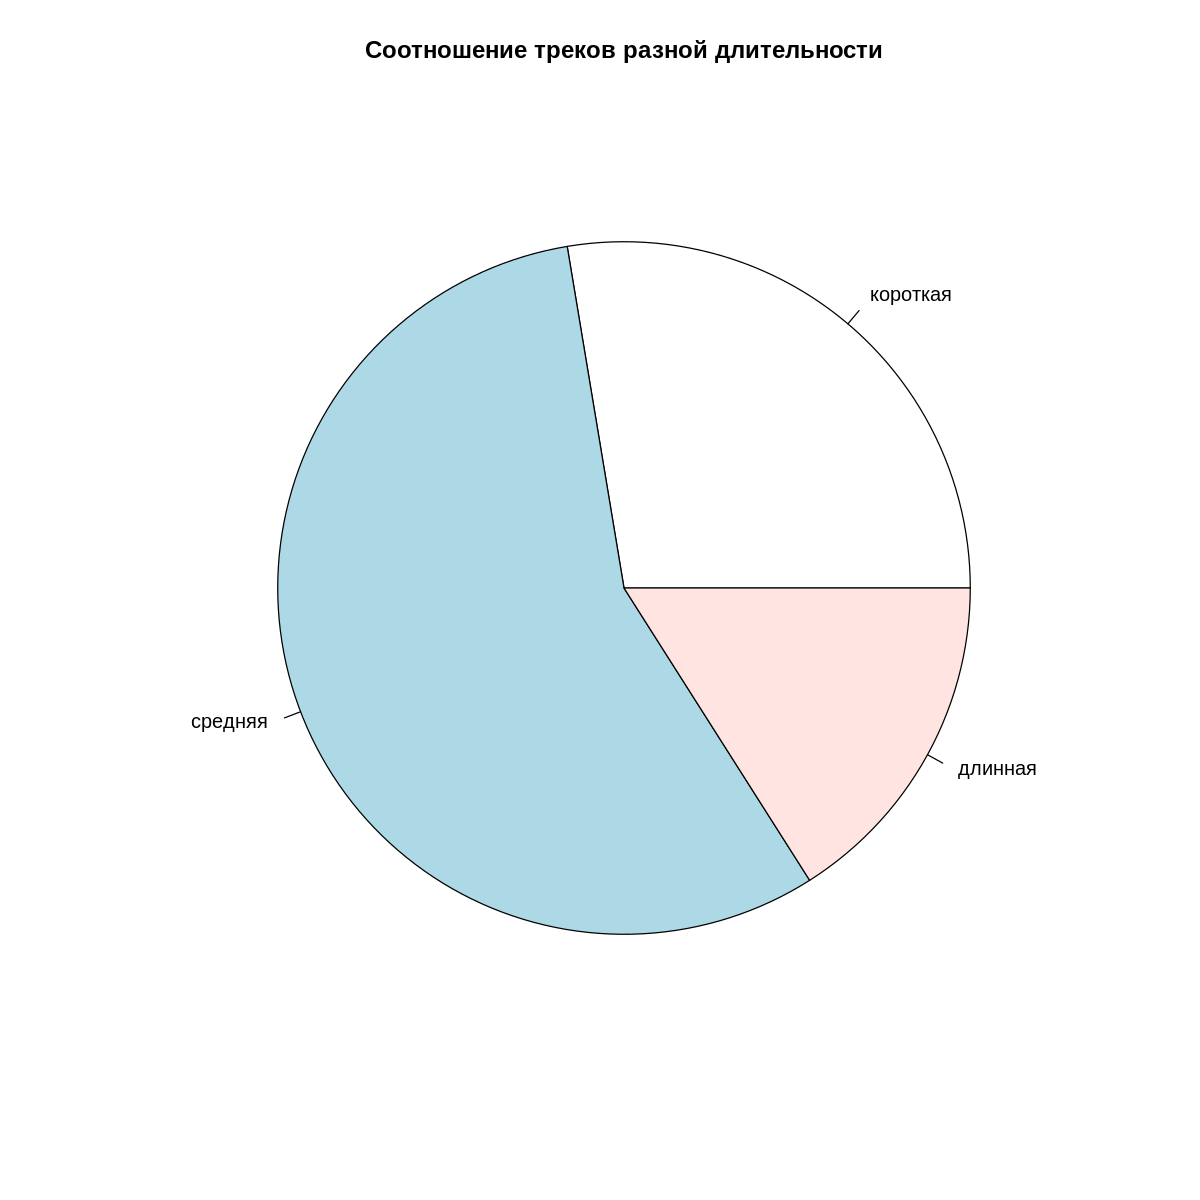

In [ ]:
# создаем вектор с категориями длительности треков
duration_categories <- c("короткая", "средняя", "длинная")

# считаем количество треков в каждой категории
duration_counts <- table(data_frame_sample$duration_cat)

# строим круговую диаграмму
pie(duration_counts, labels = duration_categories, main = "Соотношение треков разной длительности")
